In [1]:
import numpy as np
import pandas as pd
import re
from itertools import groupby, count

In [2]:
def load(filename, sep=";"):
    df = pd.read_csv(filename,sep=sep)
    df = df[df.MetricName == "Time" ]
    df.MetricValue = df.MetricValue.astype(float)
    df.ChangeSet = df.ChangeSet.astype(int)
    # convert from nanoseconds to seconds
    df.MetricValue = df.MetricValue / 1e9    
    return df

def value_or_na(v):
    return np.nan if v.empty else v.MetricValue.values[0]

def prepare_and_plot(ldf, phase="Update", query='Q2'):
    ldf = ldf[ldf.View == query ]
    ldf = ldf[ldf.PhaseName == phase ]
    g = ldf.groupby(["Tool", "View", "ChangeSet", "PhaseName", "MetricName"]).mean()
    g.reset_index(inplace=True)
    display(g.head())
    tools = sorted(set(g.Tool))
#    display(tools)
    df2 = pd.DataFrame(columns=['ChangeSet'] + tools)
    for changeSet in sorted(set(g.ChangeSet)):
#        display(changeSet)
        toAppend = {'ChangeSet': str(changeSet), **{tool: value_or_na(g[(g.Tool==tool) & (g.ChangeSet==changeSet)]) for tool in tools}}
        df2 = df2.append(toAppend, ignore_index=True)
    display(df2)
    df2.plot(x='ChangeSet', logy=True, style='.-', grid=True, title=phase)

PHASE_INITIAL = "Initial"
PHASE_UPDATE = "Update"

In [3]:
df = load('results/output.csv',sep=';')

Tool View  ChangeSet PhaseName MetricName  RunIndex  \
0  namelookup-xml-flush   Q2          8   Initial       Time         0   
1  namelookup-xml-flush   Q2         16   Initial       Time         0   
2  namelookup-xml-flush   Q2         32   Initial       Time         0   
3  namelookup-xml-flush   Q2         64   Initial       Time         0   
4  namelookup-xml-flush   Q2        128   Initial       Time         0   

   Iteration  MetricValue  
0          0     0.017459  
1          0     0.051881  
2          0     0.116222  
3          0     0.399595  
4          0     2.456226

ChangeSet  namelookup-xml-flush  namelookup-xml-inc  relast-reusable-flush  \
0         8              0.017459            0.034966               0.016809   
1        16              0.051881            0.089643               0.025637   
2        32              0.116222            0.215648               0.042131   
3        64              0.399595            0.682137               0.064535   
4       128              2.456226            4.353875               0.114178   

   relast-reusable-inc  relast-xml-flush  relast-xml-inc  
0             0.040396          0.014307        0.025429  
1             0.050947          0.031076        0.046838  
2             0.117571          0.102511        0.143685  
3             0.209905          0.283938        0.397969  
4             0.427490          1.825512        2.526684

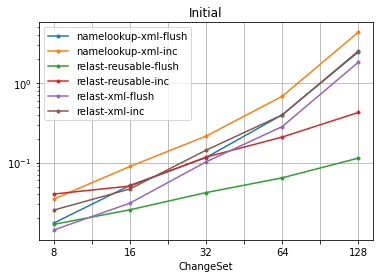

In [4]:
prepare_and_plot(df, PHASE_INITIAL)

Tool View  ChangeSet PhaseName MetricName  RunIndex  \
0  namelookup-xml-flush   Q2          8    Update       Time       0.0   
1  namelookup-xml-flush   Q2         16    Update       Time       0.0   
2  namelookup-xml-flush   Q2         32    Update       Time       0.0   
3  namelookup-xml-flush   Q2         64    Update       Time       0.0   
4  namelookup-xml-flush   Q2        128    Update       Time       0.0   

   Iteration  MetricValue  
0       10.5     0.004956  
1       10.5     0.014071  
2       10.5     0.050026  
3       10.5     0.238042  
4       10.5     2.203233

ChangeSet  namelookup-xml-flush  namelookup-xml-inc  relast-reusable-flush  \
0         8              0.004956            0.012070               0.003319   
1        16              0.014071            0.022902               0.006055   
2        32              0.050026            0.053385               0.010640   
3        64              0.238042            0.188963               0.017379   
4       128              2.203233            0.607577               0.038637   

   relast-reusable-inc  relast-xml-flush  relast-xml-inc  
0             0.006073          0.003382        0.006423  
1             0.010526          0.009128        0.012205  
2             0.021106          0.035256        0.026071  
3             0.039525          0.152674        0.083124  
4             0.078485          1.629153        0.316941

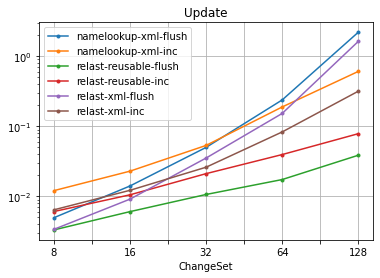

In [5]:
prepare_and_plot(df, PHASE_UPDATE)

In [6]:
ggdf = load('output-docker-2021-04-22T16.29.58-java11.csv',sep=';')

Tool View  ChangeSet PhaseName MetricName  \
0  jastadd-relast-reusable-flush   Q2          1   Initial       Time   
1  jastadd-relast-reusable-flush   Q2          2   Initial       Time   
2  jastadd-relast-reusable-flush   Q2          4   Initial       Time   
3  jastadd-relast-reusable-flush   Q2          8   Initial       Time   
4  jastadd-relast-reusable-flush   Q2         16   Initial       Time   

   RunIndex  Iteration  MetricValue  
0         0          0     0.015003  
1         0          0     0.017701  
2         0          0     0.021071  
3         0          0     0.025645  
4         0          0     0.030807

ChangeSet  jastadd-relast-reusable-flush  jastadd-relast-reusable-inc  \
0          1                       0.015003                     0.019933   
1          2                       0.017701                     0.025262   
2          4                       0.021071                     0.031845   
3          8                       0.025645                     0.050149   
4         16                       0.030807                     0.079381   
5         32                       0.048201                     0.140781   
6         64                       0.086057                     0.247120   
7        128                       0.165314                     0.444614   
8        256                       0.301716                     0.783245   
9        512                       0.528066                     1.581990   
10      1024                       1.133841                     3.381065   

    jastadd-relast-xml-flush  jastadd-relast-xml-inc  
0                   0.015648                0.014249  
1                   0.018504                0.018222  
2                   0.025999                0.023545  
3                   0.037249                0.037166  
4                   0.065508                0.061003  
5                   0.174442                0.158202  
6                   0.448559                0.415601  
7                   3.527665                3.318671  
8                  31.515041               29.187061  
9                        NaN                     NaN  
10                       NaN                     NaN

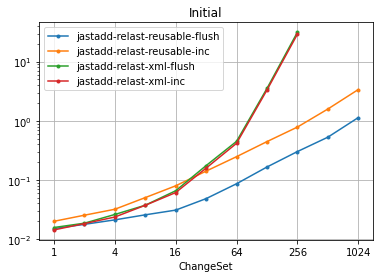

In [7]:
prepare_and_plot(ggdf, phase=PHASE_INITIAL)

Tool View  ChangeSet PhaseName MetricName  \
0  jastadd-relast-reusable-flush   Q2          1    Update       Time   
1  jastadd-relast-reusable-flush   Q2          2    Update       Time   
2  jastadd-relast-reusable-flush   Q2          4    Update       Time   
3  jastadd-relast-reusable-flush   Q2          8    Update       Time   
4  jastadd-relast-reusable-flush   Q2         16    Update       Time   

   RunIndex  Iteration  MetricValue  
0       0.0       10.5     0.001189  
1       0.0       10.5     0.002261  
2       0.0       10.5     0.003098  
3       0.0       10.5     0.005166  
4       0.0       10.5     0.008128

ChangeSet  jastadd-relast-reusable-flush  jastadd-relast-reusable-inc  \
0          1                       0.001189                     0.001805   
1          2                       0.002261                     0.003171   
2          4                       0.003098                     0.005977   
3          8                       0.005166                     0.009463   
4         16                       0.008128                     0.016735   
5         32                       0.014843                     0.030060   
6         64                       0.032173                     0.055751   
7        128                       0.063316                     0.108934   
8        256                       0.148531                     0.217814   
9        512                       0.379443                     0.484185   
10      1024                       1.081582                     0.672208   

    jastadd-relast-xml-flush  jastadd-relast-xml-inc  
0                   0.001732                0.001469  
1                   0.003021                0.002706  
2                   0.005393                0.004810  
3                   0.010448                0.009266  
4                   0.019091                0.017765  
5                   0.041859                0.039395  
6                   0.118721                0.111231  
7                   0.415689                0.376500  
8                   5.551732                5.419983  
9                        NaN                     NaN  
10                       NaN                     NaN

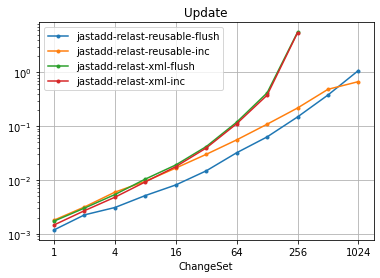

In [8]:
prepare_and_plot(ggdf, phase=PHASE_UPDATE)

Tool View  ChangeSet PhaseName MetricName  \
0  jastadd-relast-reusable-flush   Q1          1   Initial       Time   
1  jastadd-relast-reusable-flush   Q1          2   Initial       Time   
2  jastadd-relast-reusable-flush   Q1          4   Initial       Time   
3  jastadd-relast-reusable-flush   Q1          8   Initial       Time   
4  jastadd-relast-reusable-flush   Q1         16   Initial       Time   

   RunIndex  Iteration  MetricValue  
0         0          0     0.009767  
1         0          0     0.010879  
2         0          0     0.012476  
3         0          0     0.012990  
4         0          0     0.015991

ChangeSet  jastadd-relast-reusable-flush  jastadd-relast-reusable-inc  \
0          1                       0.009767                     0.014784   
1          2                       0.010879                     0.017063   
2          4                       0.012476                     0.021022   
3          8                       0.012990                     0.026704   
4         16                       0.015991                     0.037474   
5         32                       0.019786                     0.065975   
6         64                       0.027380                     0.120008   
7        128                       0.044298                     0.206033   
8        256                       0.080795                     0.360224   
9        512                       0.126134                     0.675223   
10      1024                       0.204023                     1.257982   

    jastadd-relast-xml-flush  jastadd-relast-xml-inc  
0                   0.013163                0.013747  
1                   0.015925                0.015979  
2                   0.019902                0.019872  
3                   0.024901                0.025397  
4                   0.037270                0.037604  
5                   0.068592                0.065704  
6                   0.122040                0.113032  
7                   0.217752                0.206561  
8                   0.366728                0.348644  
9                   0.668883                0.651784  
10                  1.244882                1.200255

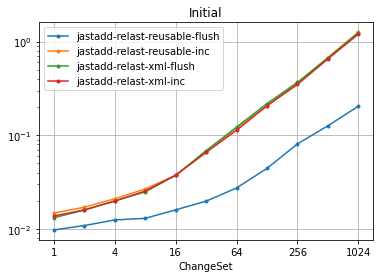

In [9]:
prepare_and_plot(ggdf, phase=PHASE_INITIAL, query="Q1")

In [10]:
newdf = load('results/merged-2021-04-23_12-40-35.csv')

Tool View  ChangeSet PhaseName MetricName  Iteration  \
0  relast-reusable-flush   Q2          8   Initial       Time          0   
1  relast-reusable-flush   Q2         16   Initial       Time          0   
2  relast-reusable-flush   Q2         32   Initial       Time          0   
3  relast-reusable-flush   Q2         64   Initial       Time          0   
4  relast-reusable-flush   Q2        128   Initial       Time          0   

   MetricValue  
0     0.017487  
1     0.029385  
2     0.046105  
3     0.073027  
4     0.118512

ChangeSet  relast-reusable-flush  relast-reusable-inc  relast-xml-flush  \
0         8               0.017487             0.038890          0.016371   
1        16               0.029385             0.057344          0.031096   
2        32               0.046105             0.127792          0.094724   
3        64               0.073027             0.236716          0.274071   
4       128               0.118512             0.431099          1.573482   

   relast-xml-inc  
0        0.025484  
1        0.044917  
2        0.147872  
3        0.380728  
4        2.494142

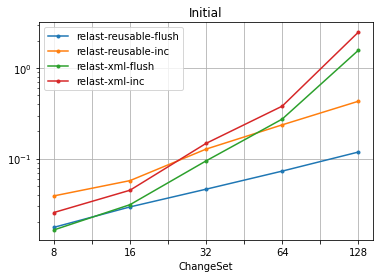

In [11]:
prepare_and_plot(newdf, phase=PHASE_INITIAL)

Tool View  ChangeSet PhaseName MetricName  Iteration  \
0  relast-reusable-flush   Q2          8    Update       Time       10.5   
1  relast-reusable-flush   Q2         16    Update       Time       10.5   
2  relast-reusable-flush   Q2         32    Update       Time       10.5   
3  relast-reusable-flush   Q2         64    Update       Time       10.5   
4  relast-reusable-flush   Q2        128    Update       Time       10.5   

   MetricValue  
0     0.003376  
1     0.006238  
2     0.016220  
3     0.017028  
4     0.035924

ChangeSet  relast-reusable-flush  relast-reusable-inc  relast-xml-flush  \
0         8               0.003376             0.005956          0.003368   
1        16               0.006238             0.010285          0.010808   
2        32               0.016220             0.021703          0.035156   
3        64               0.017028             0.039328          0.152410   
4       128               0.035924             0.080913          1.504092   

   relast-xml-inc  
0        0.006453  
1        0.014899  
2        0.027184  
3        0.092637  
4        0.308104

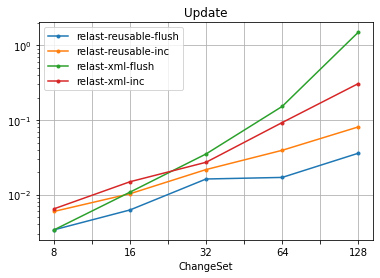

In [12]:
prepare_and_plot(newdf, phase=PHASE_UPDATE)